<a href="https://colab.research.google.com/github/meganrice/Hotel_Service_Industry_Human_vs_Robot/blob/main/Hotel_Service_Industry_Final_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd 
import numpy as np

#### Exploratory Data Analysis ####
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords,wordnet 
from wordcloud import WordCloud

#### Text Preprocessing ####
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Model Evaluation
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

##### ML Imports ####
# required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# required vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# required for splitting the data
from sklearn.model_selection import train_test_split 

#### DL Imports ####
# BERT
# select GPU in Runtime -> Change runtime type
# install bert-sklearn from GitHub
# bert-sklearn automatically creates a BERT neural network with sklearn
!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .

# set up workspace
from bert_sklearn import BertClassifier
from IPython.display import clear_output
from os import chdir
chdir("/content/bert-sklearn")
clear_output()
# required libraries for training the model
from sklearn.neural_network import MLPClassifier

# Install zeugma
!pip install zeugma
from zeugma.embeddings import EmbeddingTransformer

# Optional: clear output from installing zeugma
from IPython.display import clear_output
clear_output()

#### SS Imports ####
# Sentiment Analysis
from textblob import TextBlob

# Afinn
!pip install afinn
from afinn import Afinn

from tqdm.notebook import tqdm

# SentiWordNet
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata

from nltk.corpus import sentiwordnet as swn
import nltk
nltk.download('sentiwordnet')

nltk.download('all', halt_on_error=False)
nlp=spacy.load('en',parse=False,tag=False,entity=False)
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

# Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=9a39f1dad95f7031b4ca2653a11

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Reading in the Reviews Corpus

In [ ]:
# reading in data
df = pd.read_csv('/content/Robot Hotel Service Megan.xlsx - Source Data.csv')

In [ ]:
# reading in data with proper dtypes
parse_date_fn = lambda val: pd.datetime.strptime(val, '%m/%d/%Y')
df = pd.read_csv('/content/Robot Hotel Service Megan.xlsx - Source Data.csv', parse_dates=['Review date','Stay date'], date_parser=parse_date_fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
# examining first two rows
df.head(2)

,Review ID,Hotel,Review date,Stay date,Review helpful votes,Username,User contributions,User hometown,Rating,Mentions robots,Review title,Review text
0,1,"Aloft Cupertino, California",2021-08-24,2021-08-31,0,wlovetro,3,"Leawood, Kansas",1,0,Really gone down hill,"Used to be my favorite Silicon Valley Hotel, d..."
1,2,"Aloft Cupertino, California",2021-07-29,2021-07-31,1,kenji4861,414,"San Jose, California",1,0,Aloft Cupertino is a nice hotel managed by bad...,Negative Points\n\n* You can hear everything i...


In [ ]:
# renaming columns
df.rename(columns={'Review ID':'review_id',
                   'Review date':'review_date',
                   'Stay date':'stay_date',
                   'Review helpful votes':'review_helpful_votes',
                   'User contributions':'user_contributions',
                   'User hometown':'user_hometown',
                   'Rating':'rating',
                   'Mentions robots':'mentions_robots',
                   'Review title':'review_title',
                   'Review text':'review_text'},inplace=True)

In [ ]:
# create high_low column
df['high_low'] = np.where(df['rating'] > 3, 1, 0)

In [ ]:
# creating a human services only dataset
human = df[df['mentions_robots'] == 0]

In [ ]:
# creating a robot services dataset
robot = df[df['mentions_robots'] == 1]

In [ ]:
# creating a high and low dataset for every service category
df_high = df[df['high_low'] == 1]
df_low = df[df['high_low'] == 0]

human_high = human[human['high_low'] == 1]
human_low = human[human['high_low'] == 0]

robot_high = robot[robot['high_low'] == 1]
robot_low = robot[robot['high_low'] == 0]

# Exploratory Data Analysis (EDA)

In [ ]:
# checking for null values
df.isna().sum()

review_id                   0
Hotel                       0
review_date                 0
stay_date                   0
review_helpful_votes        0
Username                    3
user_contributions          0
user_hometown           12087
rating                      0
mentions_robots             0
review_title                0
review_text                 0
high_low                    0
dtype: int64

In [ ]:
# examing index dtype and columns, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32829 entries, 0 to 32828
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   review_id             32829 non-null  int64         
 1   Hotel                 32829 non-null  object        
 2   review_date           32829 non-null  datetime64[ns]
 3   stay_date             32829 non-null  datetime64[ns]
 4   review_helpful_votes  32829 non-null  int64         
 5   Username              32826 non-null  object        
 6   user_contributions    32829 non-null  int64         
 7   user_hometown         20742 non-null  object        
 8   rating                32829 non-null  int64         
 9   mentions_robots       32829 non-null  int64         
 10  review_title          32829 non-null  object        
 11  review_text           32829 non-null  object        
 12  high_low              32829 non-null  int64         
dtypes: datetime64[ns

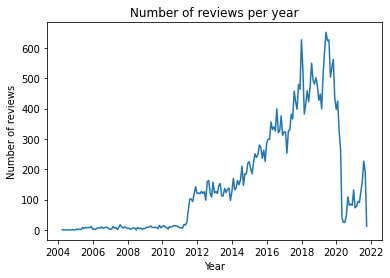

In [ ]:
df = df.set_index('review_date')
plt.plot(df['review_text'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per year')
plt.show()

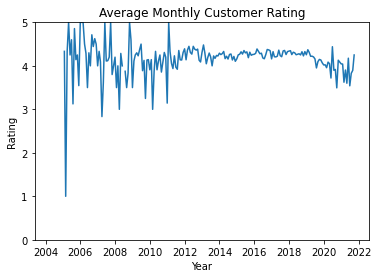

In [ ]:
plt.plot(df['rating'].resample('M').mean())
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5)
plt.show()

## Examining Rating Distribution

In [ ]:
# discover the actual counts of reviews peresent in Rating column
df['rating'].value_counts().sort_index(ascending=False)

5    17152
4     9773
3     3149
2     1428
1     1327
Name: rating, dtype: int64

In [ ]:
df['rating'].describe()

count    32829.000000
mean         4.218283
std          1.052881
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

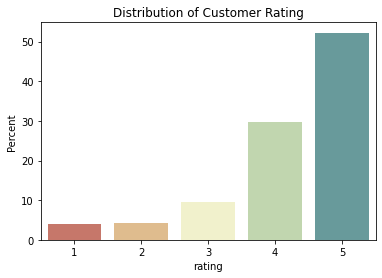

In [ ]:
# histogram of ratings
colors=['#D56C5B', '#ECBE81', '#F7F7C6', '#C0DCA9', '#60A2A3']
ax = sns.barplot(data=df, x='rating', y='rating', palette= colors, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

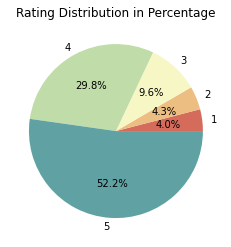

In [ ]:
# pie chart of ratings
labels= ['1', '2', '3', '4','5']
plt.pie(data=df, x=df['rating'].value_counts().sort_index(ascending=True), labels = labels, colors=colors, autopct='%1.1f%%')
plt.title('Rating Distribution in Percentage')
plt.show()

Text(0.5, 1.0, 'High Rated Reviews vs Low Rated Reviews')

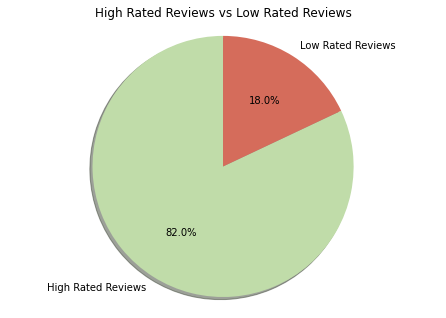

In [ ]:
# ratio of high and low reviews
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = [len(df_high), len(df_low)]

ax.pie(values, 
       labels = ['High Rated Reviews', 'Low Rated Reviews'],
       colors=['#C0DCA9','#D56C5B'],
       shadow=True,
       startangle=90, 
       autopct='%1.1f%%')
ax.axis('equal')
plt.title('High Rated Reviews vs Low Rated Reviews')

## Wordclouds

In [ ]:
# wordnet and treebank have different tagging systems
# Create a function to define a mapping between wordnet tags and POS tags 
def get_wordnet_pos(pos_tag):

    if pos_tag.startswith('J'):
        return wordnet.ADJ 

    elif pos_tag.startswith('V'):
        return wordnet.VERB 

    elif pos_tag.startswith('N'):
        return wordnet.NOUN

    elif pos_tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN # default, return wordnet tag "NOUN"

#Create a function to lemmatize tokens in the reviews
def lemmatized_tokens(text):
        text = text.lower()
        pattern = r'\b[a-zA-Z]{3,}\b'                 
        tokens = nltk.regexp_tokenize(text, pattern) # tokenize the text
        tagged_tokens = nltk.pos_tag(tokens)  # a list of tuples (word, pos_tag)
          
        stop_words = stopwords.words('english')
        new_stopwords = ["hotel","everything","anything","nothing","thing","need",
                        "good","great","excellent","perfect","much","even","really"]  #customize extra stop_words
        stop_words.extend(new_stopwords)
        stop_words = set(stop_words)
        
        wordnet_lemmatizer = WordNetLemmatizer()
        # get lemmatized tokens                             #call function "get_wordnet_pos"
        lemmatized_words=[wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) 
                  # tagged_tokens is a list of tuples (word, tag)
                  for (word, tag) in tagged_tokens \
                  # remove stop words
                  if word not in stop_words and \
                  # remove punctuations
                  word not in string.punctuation]

        return lemmatized_words

In [ ]:
#Create a function to generate wordcloud
def wordcloud(review_df, review_colname, color, title):
    '''    
    INPUTS:
        reivew_df - dataframe, positive or negative reviews
        review_colname - column name, positive or negative review
        color - background color of worldcloud
        title - title of the wordcloud
    OUTPUT:
    Wordcloud visuazliation
    '''  
    text = review_df[review_colname].tolist()
    text_str = ' '.join(lemmatized_tokens(' '.join(text))) #call function "lemmatized_tokens"
    wordcloud = WordCloud(collocations = False,
                          background_color = color,
                          width=1600, 
                          height=800, 
                          margin=2,
                          min_font_size=20).generate(text_str)

    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figtext(.5,.8,title,fontsize = 20, ha='center')
    plt.show()

### Human Services

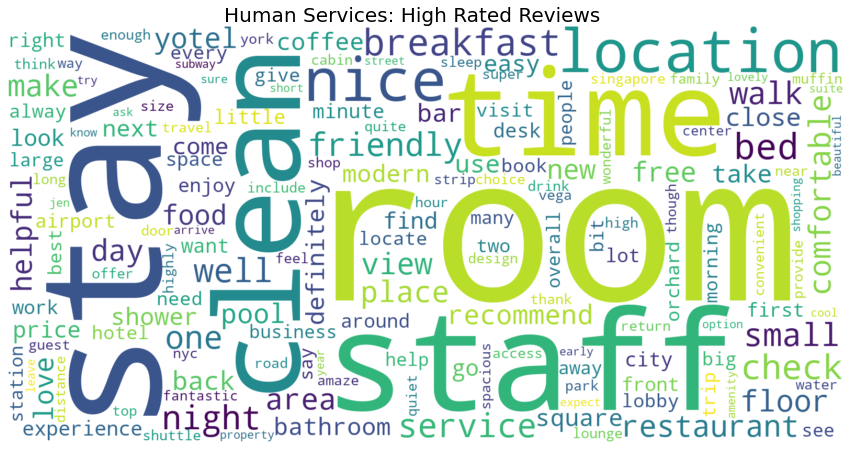

In [ ]:
# Wordcoulds for Positive Reviews
wordcloud(human_high,'review_text', 'white','Human Services: High Rated Reviews')

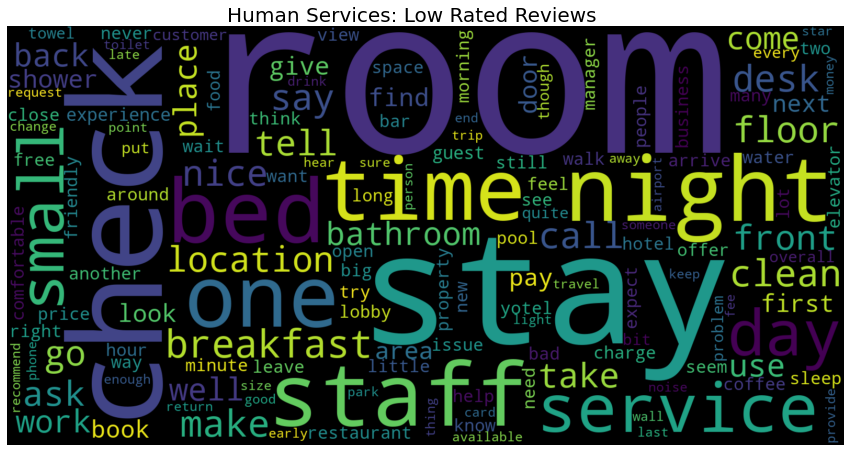

In [ ]:
# WordCoulds for Negative Reviews
wordcloud(human_low,'review_text', 'black', 'Human Services: Low Rated Reviews')

### Robot Services

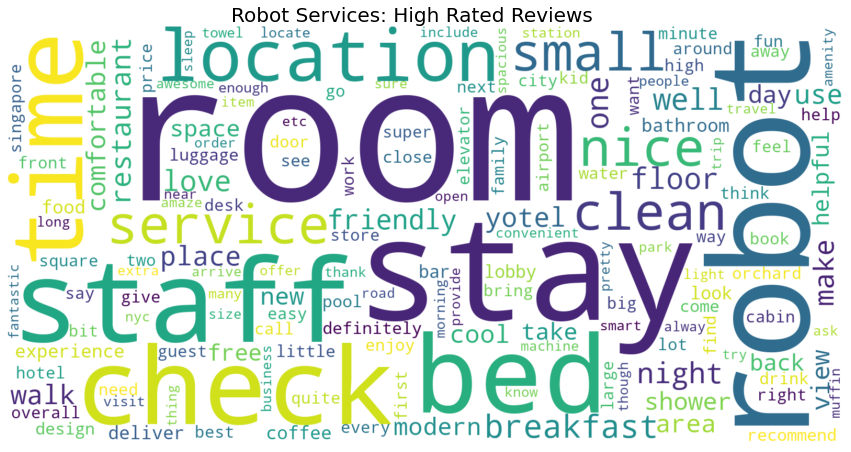

In [ ]:
# Wordcoulds for Positive Reviews
wordcloud(robot_high,'review_text', 'white','Robot Services: High Rated Reviews')

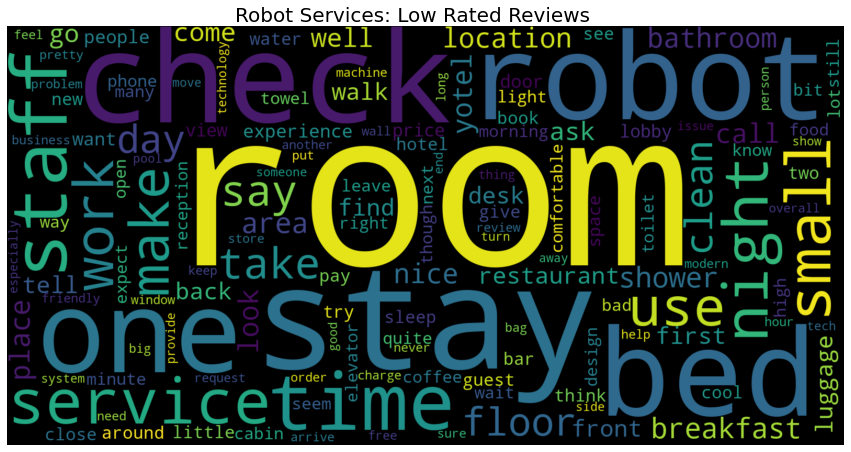

In [ ]:
# WordCoulds for Negative Reviews
wordcloud(robot_low,'review_text', 'black', 'Robot Services: Low Rated Reviews')

# Text Preprocessing

Reference: https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e#:~:text=Text%20classification%20is%20one%20of,in%20a%20cost%2Deffective%20manner.

In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

# stopword removal
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
# lemmatization
# initialize the lemmatizer
wl = WordNetLemmatizer()
 
# this is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df['clean_text'] = df['review_text'].apply(lambda x: finalpreprocess(x))
df.head(2)

,review_id,Hotel,review_date,stay_date,review_helpful_votes,Username,user_contributions,user_hometown,rating,mentions_robots,review_title,review_text,high_low,clean_text
0,1,"Aloft Cupertino, California",2021-08-24,2021-08-31,0,wlovetro,3,"Leawood, Kansas",1,0,Really gone down hill,"Used to be my favorite Silicon Valley Hotel, d...",0,use favorite silicon valley hotel know happen ...
1,2,"Aloft Cupertino, California",2021-07-29,2021-07-31,1,kenji4861,414,"San Jose, California",1,0,Aloft Cupertino is a nice hotel managed by bad...,Negative Points\n\n* You can hear everything i...,0,negative point hear everything hallway upstair...


# Sentiment Analysis

## Textblob

In [ ]:
# create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

# creating new df
df_TB = df

# create two new columns
df_TB['Subjectivity'] = df['clean_text'].apply(subjectivity)
df_TB['Polarity'] = df['clean_text'].apply(polarity)

In [ ]:
# create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_TB['Analysis'] = df_TB['Polarity'].apply(getAnalysis)

In [ ]:
df_TB.head(2)

,review_id,Hotel,review_date,stay_date,review_helpful_votes,Username,user_contributions,user_hometown,rating,mentions_robots,review_title,review_text,high_low,clean_text,Subjectivity,Polarity,Analysis
0,1,"Aloft Cupertino, California",2021-08-24,2021-08-31,0,wlovetro,3,"Leawood, Kansas",1,0,Really gone down hill,"Used to be my favorite Silicon Valley Hotel, d...",0,use favorite silicon valley hotel know happen ...,0.700000,0.416667,Positive
1,2,"Aloft Cupertino, California",2021-07-29,2021-07-31,1,kenji4861,414,"San Jose, California",1,0,Aloft Cupertino is a nice hotel managed by bad...,Negative Points\n\n* You can hear everything i...,0,negative point hear everything hallway upstair...,0.493171,0.112828,Positive


In [ ]:
# creating a human services only dataset
human_TB = df_TB[df_TB['mentions_robots'] == 0]

In [ ]:
# creating a robot services only dataset
robot_TB = df_TB[df_TB['mentions_robots'] == 1]

### Human Services

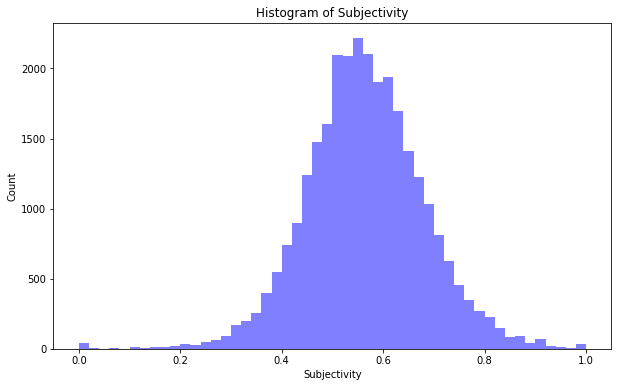

In [ ]:
# plot the histogram for displaying the distribution of subjectivity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(human_TB.Subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity')
plt.show()

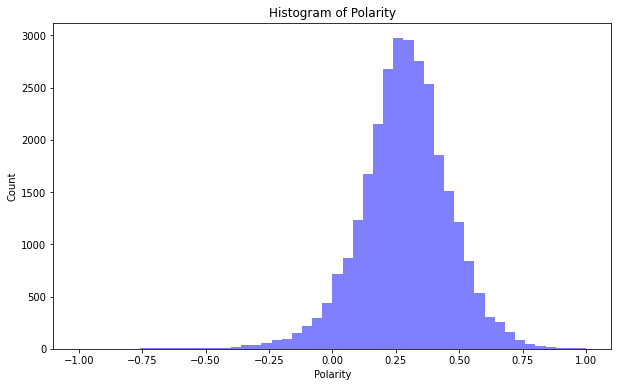

In [ ]:
# plot the histogram for displaying the distribution of polarity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(human_TB.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



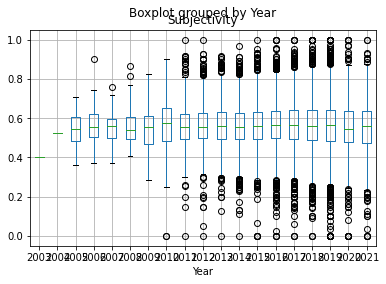

In [ ]:
# create a new column "Year" by only extracting the year 
# information from the "Date" column
human_TB['Year'] = human_TB['stay_date'].dt.year

# plot boxplot for polarity grouped by Overall ratings
human_TB.boxplot('Subjectivity', by='Year')

In [ ]:
# plot the polarity and subjectivity
fig = px.scatter(human_TB, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

# add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis: Human Services Only',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

### Robot Services

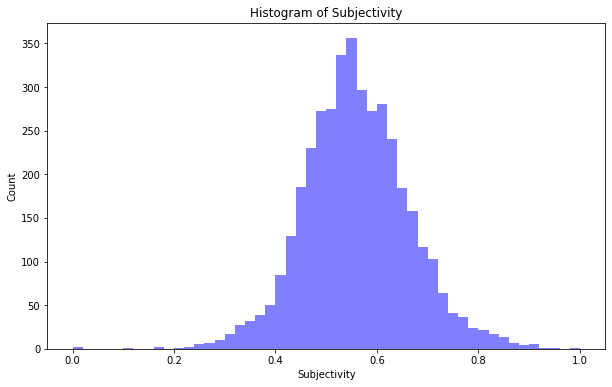

In [ ]:
# plot the histogram for displaying the distribution of subjectivity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(robot_TB.Subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity')
plt.show()

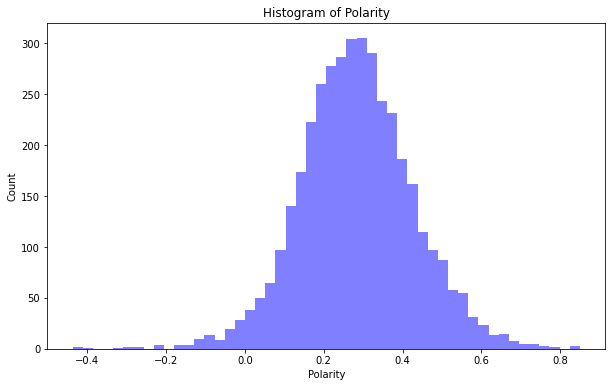

In [ ]:
# plot the histogram for displaying the distribution of polarity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(robot_TB.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



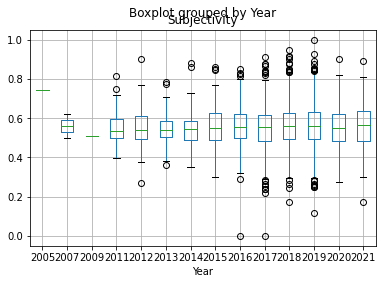

In [ ]:
# create a new column "Year" by only extracting the year 
# information from the "Date" column
robot_TB['Year'] = robot_TB['stay_date'].dt.year

# plot boxplot for polarity grouped by Overall ratings
robot_TB.boxplot('Subjectivity', by='Year')

In [ ]:
# plot the polarity and subjectivity
fig = px.scatter(robot_TB, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

# add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis: Robot Services Only',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

# Mitigating Skewness - Undersampling

Reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [ ]:
df.high_low.value_counts()

1    26925
0     5904
Name: high_low, dtype: int64

In [ ]:
count_class_0, count_class_1 = df.high_low.value_counts()

df_class_0 = df[df['high_low'] == 0]
df_class_1 = df[df['high_low'] == 1]

In [ ]:
df_class_0.shape

(5904, 13)

In [ ]:
df_class_1.shape

(26925, 13)

In [ ]:
count_class_0, count_class_1

(26925, 5904)

In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_1_under = df_class_1.sample(count_class_1)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_under.high_low.value_counts())

Random under-sampling:
1    5904
0    5904
Name: high_low, dtype: int64


In [ ]:
# saving back into original name
df = df_test_under 

In [ ]:
# checking it was successful
df.high_low.value_counts()

1    5904
0    5904
Name: high_low, dtype: int64

In [ ]:
# creating a human services only dataset
human = df[df['mentions_robots'] == 0]

In [ ]:
# creating a robot services dataset
robot = df[df['mentions_robots'] == 1]

In [ ]:
# creating a high and low dataset for every service category
df_high = df[df['high_low'] == 1]
df_low = df[df['high_low'] == 0]

human_high = human[human['high_low'] == 1]
human_low = human[human['high_low'] == 0]

robot_high = robot[robot['high_low'] == 1]
robot_low = robot[robot['high_low'] == 0]

# ML Models

In [ ]:
# instantiate machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
mnb_model = MultinomialNB()

Reference: https://towardsdatascience.com/machine-learning-classifiers-comparison-with-python-33149aecdbca

In [ ]:
def models_evaluation(X, y, vect):

    # splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)

    # perform each machine learning classifier
    # use selected model to predict the high or low star rating
    log_model.fit(X_train_dtm, y_train)
    log = y_pred_class = log_model.predict(X_test_dtm)

    svc_model.fit(X_train_dtm, y_train)
    svc = y_pred_class = svc_model.predict(X_test_dtm)

    dtr_model.fit(X_train_dtm, y_train)
    dtr = y_pred_class = dtr_model.predict(X_test_dtm)

    rfc_model.fit(X_train_dtm, y_train)
    rfc = y_pred_class = rfc_model.predict(X_test_dtm)

    mnb_model.fit(X_train_dtm, y_train)
    mnb = y_pred_class = mnb_model.predict(X_test_dtm)

    # create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[accuracy_score(y_test,log).mean(),
                                                               precision_score(y_test,log).mean(),
                                                               recall_score(y_test,log).mean(),
                                                               f1_score(y_test,log).mean(),
                                                               roc_auc_score(y_test,log).mean()],
                                       
                                      'Support Vector Classifier':[accuracy_score(y_test,svc).mean(),
                                                                   precision_score(y_test,svc).mean(),
                                                                   recall_score(y_test,svc).mean(),
                                                                   f1_score(y_test,svc).mean(),
                                                                   roc_auc_score(y_test,svc).mean()],
                                       
                                      'Decision Tree':[accuracy_score(y_test,dtr).mean(),
                                                       precision_score(y_test,dtr).mean(),
                                                       recall_score(y_test,dtr).mean(),
                                                       f1_score(y_test,dtr).mean(),
                                                       roc_auc_score(y_test,dtr).mean()],
                                       
                                      'Random Forest':[accuracy_score(y_test,rfc).mean(),
                                                       precision_score(y_test,rfc).mean(),
                                                       recall_score(y_test,rfc).mean(),
                                                       f1_score(y_test,rfc).mean(),
                                                       roc_auc_score(y_test,rfc).mean()],
                                       
                                      'Multinomial Naive Bayes':[accuracy_score(y_test,mnb).mean(),
                                                              precision_score(y_test,mnb).mean(),
                                                              recall_score(y_test,mnb).mean(),
                                                              f1_score(y_test,mnb).mean(),
                                                              roc_auc_score(y_test,mnb).mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
    # add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # return models performance metrics scores data frame
    return(models_scores_table)

In [ ]:
# vectorizer
CV = CountVectorizer()
TFIDF = TfidfVectorizer()

## Performance Evaluation

### Human Services

In [ ]:
# run models_evaluation function on human dataset with CV
models_evaluation(human.clean_text, human.high_low, CV)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Multinomial Naive Bayes,Best Score
Accuracy,0.856391,0.833083,0.716541,0.837594,0.849248,Logistic Regression
Precision,0.857357,0.830119,0.721037,0.861378,0.828290,Random Forest
Recall,0.856072,0.838831,0.709145,0.805847,0.882309,Multinomial Naive Bayes
F1 Score,0.856714,0.834452,0.715042,0.832688,0.854446,Logistic Regression
AUC,0.856392,0.833065,0.716564,0.837690,0.849148,Logistic Regression


In [ ]:
# run models_evaluation function on human dataset with TFIDF
models_evaluation(human.clean_text, human.high_low, TFIDF)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Multinomial Naive Bayes,Best Score
Accuracy,0.863910,0.860150,0.713534,0.829699,0.848872,Logistic Regression
Precision,0.877916,0.860570,0.717988,0.833460,0.862364,Logistic Regression
Recall,0.846327,0.860570,0.706147,0.825337,0.831334,Support Vector Classifier
F1 Score,0.861832,0.860570,0.712018,0.829379,0.846565,Logistic Regression
AUC,0.863963,0.860149,0.713556,0.829712,0.848925,Logistic Regression


### Robot Services

In [ ]:
# run models_evaluation function on robot dataset with CV
models_evaluation(robot.clean_text, robot.high_low, CV)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Multinomial Naive Bayes,Best Score
Accuracy,0.764505,0.757679,0.655290,0.716724,0.829352,Multinomial Naive Bayes
Precision,0.763819,0.766839,0.729560,0.726368,0.829787,Multinomial Naive Bayes
Recall,0.873563,0.850575,0.666667,0.839080,0.896552,Multinomial Naive Bayes
F1 Score,0.815013,0.806540,0.696697,0.778667,0.861878,Multinomial Naive Bayes
AUC,0.739303,0.736212,0.652661,0.688448,0.813822,Multinomial Naive Bayes


In [ ]:
# run models_evaluation function on robot dataset with TFIDF
models_evaluation(robot.clean_text, robot.high_low, TFIDF)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Multinomial Naive Bayes,Best Score
Accuracy,0.798635,0.808874,0.638225,0.730375,0.778157,Support Vector Classifier
Precision,0.788945,0.813830,0.670000,0.738693,0.737991,Support Vector Classifier
Recall,0.902299,0.879310,0.770115,0.844828,0.971264,Multinomial Naive Bayes
F1 Score,0.841823,0.845304,0.716578,0.788204,0.838710,Support Vector Classifier
AUC,0.774679,0.792596,0.607747,0.703926,0.733531,Support Vector Classifier


# DL Models

## BERT

In [ ]:
# build BERT model
bert = BertClassifier(bert_model = "bert-base-cased")
# biobert = BertClassifier(bert_model = "biobert-base-cased")
# scibert = BertClassifier(bert_model = "scibert-scivocab-cased")

Building sklearn text classifier...


### Human Services

In [ ]:
high_low = human['high_low']
review_text = human['review_text']

In [ ]:
# build BERT model
bert = BertClassifier(bert_model = "bert-base-cased")
# biobert = BertClassifier(bert_model = "biobert-base-cased")
# scibert = BertClassifier(bert_model = "scibert-scivocab-cased")

# fit BERT model
bert = bert.fit(review_text, high_low)

Building sklearn text classifier...


100%|██████████| 213450/213450 [00:00<00:00, 2386411.45B/s]


Loading bert-base-cased model...


100%|██████████| 433/433 [00:00<00:00, 170384.99B/s]


Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 9574, validation data size: 1063



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Training  :   0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/bert_sklearn/model/pytorch_pretrained/optimization.py:275: UserWarning:

This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1050.)



Validating:   0%|          | 0/133 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.3528, Val loss: 0.3051, Val accy: 87.30%



Training  :   0%|          | 0/300 [00:00<?, ?it/s]

Validating:   0%|          | 0/133 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.1778, Val loss: 0.3275, Val accy: 87.02%



Training  :   0%|          | 0/300 [00:00<?, ?it/s]

Validating:   0%|          | 0/133 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.0776, Val loss: 0.4297, Val accy: 87.11%



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review_text'],df['high_low'], test_size=0.2, stratify=df['high_low'])

In [ ]:
y_pred = bert.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.describe()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Predicting:   0%|          | 0/296 [00:00<?, ?it/s]

,0
count,2362.000000
mean,0.496190
std,0.500091
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# convert to binary
y_pred = y_pred.round(0).astype(int)

In [ ]:
models_scores_table = pd.DataFrame({'BERT':[accuracy_score(y_test,y_pred).mean(),
                                                precision_score(y_test,y_pred).mean(),
                                                recall_score(y_test,y_pred).mean(),
                                                f1_score(y_test,y_pred).mean(),
                                                roc_auc_score(y_test,y_pred).mean()],},
                                      
                                        index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
# return models performance metrics scores data frame
models_scores_table

,BERT
Accuracy,0.967401
Precision,0.970990
Recall,0.963590
F1 Score,0.967276
AUC,0.967401


### Robot Services

In [ ]:
high_low = robot['high_low']
review_text = robot['review_text']

In [ ]:
# build BERT model
bert = BertClassifier(bert_model = "bert-base-cased")
# biobert = BertClassifier(bert_model = "biobert-base-cased")
# scibert = BertClassifier(bert_model = "scibert-scivocab-cased")

# fit BERT model
bert = bert.fit(review_text, high_low)

Building sklearn text classifier...
Loading bert-base-cased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 1054, validation data size: 117



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Training  :   0%|          | 0/33 [00:00<?, ?it/s]

Validating:   0%|          | 0/15 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.5737, Val loss: 0.3358, Val accy: 87.18%



Training  :   0%|          | 0/33 [00:00<?, ?it/s]

Validating:   0%|          | 0/15 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.3129, Val loss: 0.3452, Val accy: 85.47%



Training  :   0%|          | 0/33 [00:00<?, ?it/s]

Validating:   0%|          | 0/15 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.1722, Val loss: 0.3799, Val accy: 86.32%



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review_text'],df['high_low'], test_size=0.2, stratify=df['high_low'])

In [ ]:
y_pred = bert.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.describe()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Predicting:   0%|          | 0/296 [00:00<?, ?it/s]

,0
count,2362.000000
mean,0.516511
std,0.499833
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
# convert to binary
y_pred = y_pred.round(0).astype(int)

In [ ]:
models_scores_table = pd.DataFrame({'BERT':[accuracy_score(y_test,y_pred).mean(),
                                                precision_score(y_test,y_pred).mean(),
                                                recall_score(y_test,y_pred).mean(),
                                                f1_score(y_test,y_pred).mean(),
                                                roc_auc_score(y_test,y_pred).mean()],},
                                      
                                        index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
# return models performance metrics scores data frame
models_scores_table

,BERT
Accuracy,0.868332
Precision,0.856557
Recall,0.884843
F1 Score,0.870471
AUC,0.868332


## Glove, Word2Vec, FastText

In [ ]:
# instantiate deep learning classifiers
glove = EmbeddingTransformer('glove')
word2vec = EmbeddingTransformer('word2vec')
fasttext = EmbeddingTransformer('fasttext')

[==================================================] 100.0% 104.8/104.8MB downloaded
[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


Reference: https://towardsdatascience.com/machine-learning-classifiers-comparison-with-python-33149aecdbca

In [ ]:
def models_evaluation(model_1, model_2, model_3):

    #MODEL_1
    # transform text into vectors
    vectors_1 = model_1.transform(review_text)

    # split data into training and test portions
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(vectors_1, high_low)

    # train machine learning model
    clf = MLPClassifier()
    clf_1 = clf.fit(X_train_1, y_train_1)

    # output machine learning model performance
    predictions_1 = clf_1.predict(X_test_1)

    #MODEL_2
    # transform text into vectors
    vectors_2 = model_2.transform(review_text)

    # split data into training and test portions
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(vectors_2, high_low)

    # train machine learning model
    clf = MLPClassifier()
    clf_2 = clf.fit(X_train_2, y_train_2)

    # output machine learning model performance
    predictions_2 = clf_2.predict(X_test_2)

    #MODEL_3
    # transform text into vectors
    vectors_3 = model_3.transform(review_text)

    # split data into training and test portions
    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(vectors_3, high_low)

    # train machine learning model
    clf = MLPClassifier()
    clf_3 = clf.fit(X_train_3, y_train_3)

    # Output machine learning model performance
    predictions_3 = clf_3.predict(X_test_3)

    # create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'glove':[accuracy_score(y_test_1,predictions_1).mean(),
                                                precision_score(y_test_1,predictions_1).mean(),
                                                recall_score(y_test_1,predictions_1).mean(),
                                                f1_score(y_test_1,predictions_1).mean(),
                                                roc_auc_score(y_test_1,predictions_1).mean()],
                                       
                                        'word2vec':[accuracy_score(y_test_2,predictions_2).mean(),
                                                precision_score(y_test_2,predictions_2).mean(),
                                                recall_score(y_test_2,predictions_2).mean(),
                                                f1_score(y_test_2,predictions_2).mean(),
                                                roc_auc_score(y_test_2,predictions_2).mean()],
                                       
                                        'fasttext':[accuracy_score(y_test_3,predictions_3).mean(),
                                                precision_score(y_test_3,predictions_3).mean(),
                                                recall_score(y_test_3,predictions_3).mean(),
                                                f1_score(y_test_3,predictions_3).mean(),
                                                roc_auc_score(y_test_3,predictions_3).mean()]},
                                      
                                        index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
    # add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # return models performance metrics scores data frame
    return(models_scores_table)

### Human Services

In [ ]:
high_low = human['high_low']
review_text = human['review_text']

In [ ]:
models_evaluation(glove, word2vec, fasttext)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,glove,word2vec,fasttext,Best Score
Accuracy,0.782707,0.837594,0.846992,fasttext
Precision,0.806006,0.828290,0.838589,fasttext
Recall,0.745495,0.842308,0.853323,fasttext
F1 Score,0.774571,0.835240,0.845892,fasttext
AUC,0.782763,0.837698,0.847091,fasttext


### Robot Services

In [ ]:
high_low = robot['high_low']
review_text = robot['review_text']

In [ ]:
models_evaluation(glove, word2vec, fasttext)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,glove,word2vec,fasttext,Best Score
Accuracy,0.730375,0.802048,0.836177,fasttext
Precision,0.736527,0.842424,0.867816,fasttext
Recall,0.778481,0.812865,0.857955,fasttext
F1 Score,0.756923,0.827381,0.862857,fasttext
AUC,0.726278,0.799875,0.830687,fasttext


## Performance Evaluation

### Human Services

In [ ]:
model_scores = {'BERT': [0.967401,0.970990,0.963590,0.967276,0.967401],
        'glove': [0.782707,0.806006,0.745495,0.774571,0.782763],
        'word2vec' : [0.837594,0.828290,0.842308,0.835240,0.837698],
        'fasttext' : [0.846992,0.838589,0.853323,0.845892,0.847091]
        }

models_scores_table = pd.DataFrame(model_scores, index=['Accuracy','Precision','Recall','F1 Score','AUC'])

# add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

models_scores_table

,BERT,glove,word2vec,fasttext,Best Score
Accuracy,0.967401,0.782707,0.837594,0.846992,BERT
Precision,0.970990,0.806006,0.828290,0.838589,BERT
Recall,0.963590,0.745495,0.842308,0.853323,BERT
F1 Score,0.967276,0.774571,0.835240,0.845892,BERT
AUC,0.967401,0.782763,0.837698,0.847091,BERT


### Robot Services

In [ ]:
model_scores = {'BERT': [0.868332,0.856557,0.884843,0.870471,0.868332],
        'glove': [0.730375,0.736527,0.778481,0.756923,0.726278],
        'word2vec' : [0.802048,0.842424,0.812865,0.827381,0.799875],
        'fasttext' : [0.836177,0.867816,0.857955,0.862857,0.830687]
        }

models_scores_table = pd.DataFrame(model_scores, index=['Accuracy','Precision','Recall','F1 Score','AUC'])

# add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

models_scores_table

,BERT,glove,word2vec,fasttext,Best Score
Accuracy,0.868332,0.730375,0.802048,0.836177,BERT
Precision,0.856557,0.736527,0.842424,0.867816,fasttext
Recall,0.884843,0.778481,0.812865,0.857955,BERT
F1 Score,0.870471,0.756923,0.827381,0.862857,BERT
AUC,0.868332,0.726278,0.799875,0.830687,BERT


# SS Models

In [ ]:
def model_performance(true_labels,predicted_labels,classes):
  conf_matrix=confusion_matrix(true_labels,predicted_labels)
  df_cm=pd.DataFrame(conf_matrix,index=classes,columns=classes)
  print("Accuracy: ",accuracy_score(true_labels,predicted_labels))
  print("Precison: ", precision_score(true_labels,predicted_labels, average='weighted'))
  print("Recall: ", recall_score(true_labels,predicted_labels, average='weighted'))
  print("F1 Score: ", f1_score(true_labels,predicted_labels, average='weighted'))
  #print('AUC: ', roc_auc_score(true_labels,predicted_labels, average='weighted')) #does not work?

  print("Model Report: \n___________________________________________________",)
  print( classification_report(true_labels,predicted_labels))

  print("CONFUSION MATRIX: ")
  sns.heatmap(df_cm,annot=True, cmap="YlGnBu")

## SentiWordNet

In [ ]:
def analyze_sentiwordnet_func(review,verbose=False):
  tagged_text=[(token.text,token.tag_) for token in nlp(review)]
  pos_score=neg_score=token_count=obj_score=0

  for word, tag in tagged_text:
      ss_set = None
      if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
          ss_set = list(swn.senti_synsets(word, 'n'))[0]
      elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
          ss_set = list(swn.senti_synsets(word, 'v'))[0]
      elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
          ss_set = list(swn.senti_synsets(word, 'a'))[0]
      elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
          ss_set = list(swn.senti_synsets(word, 'r'))[0]       
      if ss_set:
          pos_score += ss_set.pos_score()
          neg_score += ss_set.neg_score()
          obj_score += ss_set.obj_score()
          token_count += 1
      
  final_score=pos_score-neg_score

  norm_final_score = (round(float(final_score)/token_count,3)) if token_count != 0 else 0
  final_sentiment ='high' if norm_final_score >=0 else 'low' 
  
  if verbose:
    print("Sentiment: ",final_sentiment)
    print("Objectivity: ",round(float(obj_score)/token_count,3))
    print("Positivity: ",round(float(pos_score)/token_count,3))
    print("Negativity: ",round(float(neg_score)/token_count,3))
  return final_sentiment

### Human Services

In [ ]:
# compute sentiment scores (polarity) and labels
afn = Afinn()
human['sentiment_score'] = [afn.score(review) for review in human['review_text']]
human['sentiment_category'] = ['high' if score >=0 else 'low' for score in human['sentiment_score']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
predicted_sentiments=[analyze_sentiwordnet_func(review) for review in tqdm(human.review_text)]

  0%|          | 0/10637 [00:00<?, ?it/s]

Accuracy:  0.8345398138572906
Precison:  0.8403157496050999
Recall:  0.8345398138572906
F1 Score:  0.8372344432637181
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

        high       0.91      0.89      0.90      8904
         low       0.49      0.53      0.51      1733

    accuracy                           0.83     10637
   macro avg       0.70      0.71      0.71     10637
weighted avg       0.84      0.83      0.84     10637

CONFUSION MATRIX: 


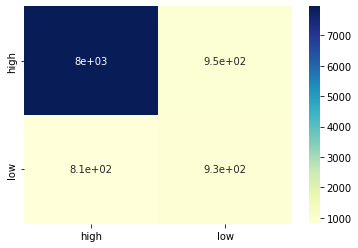

In [ ]:
model_performance(human.sentiment_category,predicted_sentiments,classes=['high','low'])

### Robot Services

In [ ]:
# compute sentiment scores (polarity) and labels
robot['sentiment_score'] = [afn.score(review) for review in robot['review_text']]
robot['sentiment_category'] = ['high' if score >=0 else 'low' for score in robot['sentiment_score']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
predicted_sentiments=[analyze_sentiwordnet_func(review) for review in tqdm(robot.review_text)]

  0%|          | 0/1171 [00:00<?, ?it/s]

Accuracy:  0.8855678906917165
Precison:  0.902092371849673
Recall:  0.8855678906917165
F1 Score:  0.8929516113603251
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

        high       0.95      0.92      0.94      1076
         low       0.35      0.46      0.40        95

    accuracy                           0.89      1171
   macro avg       0.65      0.69      0.67      1171
weighted avg       0.90      0.89      0.89      1171

CONFUSION MATRIX: 


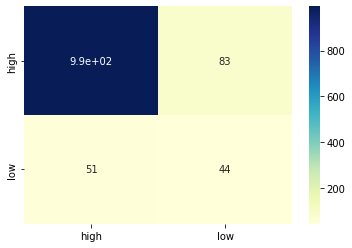

In [ ]:
model_performance(robot.sentiment_category,predicted_sentiments,classes=['high','low'])

## Vader

In [ ]:
def func_intensity_analyser(review,threshold=0.1,verbose=False):
  analyzer=SentimentIntensityAnalyzer()
  scores=analyzer.polarity_scores(review)

  agg_score=scores['compound']
  final_sentiment='high' if agg_score>=threshold else 'low'
  if verbose:
    positive = round(scores['pos'],2)*100
    final= round(agg_score,2)*100
    negative=round(scores['neg'],2)*100
    neutral =round(scores['neu'],2)*100

    print(f'POSITIVE : {positive}%')
    print(f'NEGATIVE : {negative}%')
    print(f'NEUTRAL : {neutral}%')
    print(f'FINAL : {final}')
    print(f'SENTIMENT : {final_sentiment}')
  
  return final_sentiment

### Human Services

In [ ]:
predicted_sentiments = [func_intensity_analyser(r,threshold=0.4) for r in tqdm(human.review_text)]

  0%|          | 0/10637 [00:00<?, ?it/s]

Accuracy:  0.8657516216978471
Precison:  0.9020961073595576
Recall:  0.8657516216978471
F1 Score:  0.8763160650954261
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

        high       0.97      0.87      0.92      8904
         low       0.56      0.86      0.68      1733

    accuracy                           0.87     10637
   macro avg       0.76      0.86      0.80     10637
weighted avg       0.90      0.87      0.88     10637

CONFUSION MATRIX: 


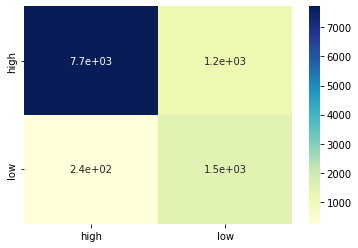

In [ ]:
model_performance(human.sentiment_category,predicted_sentiments,classes=['high','low'])

### Robot Services

In [ ]:
predicted_sentiments = [func_intensity_analyser(r,threshold=0.4) for r in tqdm(robot.review_text)]

  0%|          | 0/1171 [00:00<?, ?it/s]

Accuracy:  0.9043552519214346
Precison:  0.9388640288452416
Recall:  0.9043552519214346
F1 Score:  0.9162680646122001
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

        high       0.98      0.91      0.95      1076
         low       0.45      0.81      0.58        95

    accuracy                           0.90      1171
   macro avg       0.72      0.86      0.76      1171
weighted avg       0.94      0.90      0.92      1171

CONFUSION MATRIX: 


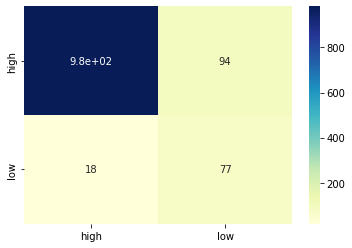

In [ ]:
model_performance(robot.sentiment_category,predicted_sentiments,classes=['high','low'])

## Performance Evaluation

### Human Services

In [ ]:
model_scores = {'SentiWordNet': [0.8345,0.8403,0.8345,0.8372],
            'Vader' : [0.8658,0.9021,0.8658,0.8763]
            }

models_scores_table = pd.DataFrame(model_scores, index=['Accuracy','Precision','Recall','F1 Score'])

# add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

models_scores_table

,SentiWordNet,Vader,Best Score
Accuracy,0.8345,0.8658,Vader
Precision,0.8403,0.9021,Vader
Recall,0.8345,0.8658,Vader
F1 Score,0.8372,0.8763,Vader


### Robot Services

In [ ]:
model_scores = {'SentiWordNet': [0.8856,0.9021,0.8856,0.8930],
        'Vader' : [0.9044,0.9389,0.9044,0.9163]
        }

models_scores_table = pd.DataFrame(model_scores, index=['Accuracy','Precision','Recall','F1 Score'])

# add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

models_scores_table

,SentiWordNet,Vader,Best Score
Accuracy,0.8856,0.9044,Vader
Precision,0.9021,0.9389,Vader
Recall,0.8856,0.9044,Vader
F1 Score,0.8930,0.9163,Vader
